In [1]:
!pip install datasets
from datasets import load_dataset, load_metric

Downloading:   0%|          | 0.00/1.89k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Using custom data configuration en-fr-lang1=en,lang2=fr


Downloading:   0%|          | 0.00/7.05M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

Dataset kde4 downloaded and prepared to /root/.cache/huggingface/datasets/kde4/en-fr-lang1=en,lang2=fr/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/211 [00:00<?, ?ba/s]

In [2]:
!pip install --upgrade tensorflow-gpu==2.0

     |████████████████████████████████| 380.8 MB 38 kB/s 
     |████████████████████████████████| 3.8 MB 22.3 MB/s 
     |████████████████████████████████| 50 kB 3.6 MB/s 
     |████████████████████████████████| 449 kB 6.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=0ce48e36eebb5252201807e822d7cc298782c57bc74d06e8a1c17d110ef12fba
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

In [3]:
# install nltk
!pip install nltk
# install gensim
!pip install gensim
# install spacy
!pip install spacy
!pip install plotly

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
!pip install jupyterthemes

     |████████████████████████████████| 7.0 MB 4.9 MB/s 
     |████████████████████████████████| 46 kB 4.7 MB/s 
     |████████████████████████████████| 9.9 MB 34.2 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 428 kB 38.8 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.8 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is 

In [1]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# # load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

# function to remove punctuations
def remove_punc(x):
    return re.sub('[!#?,.:";]', '', x)

df = pd.concat([df_english, df_french], axis = 1)

df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [8]:
english_words = []
french_words  = []

In [9]:
# function to get the list of unique words
def get_label_superset(x, word_list):
    for label in x.split():
        if label not in word_list:
            word_list.append(label)
            
            
df['english'].apply(lambda x: get_label_superset(x, english_words))
df['french'].apply(lambda x: get_label_superset(x, french_words))

# number of unique words in english
total_english_words  = len(english_words)
total_english_words

199

In [10]:
# number of unique words in french
# number of unique words in french
total_french_words = len(french_words)
total_french_words

350

In [ ]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
    for word in i.split():
        words.append(word)

In [ ]:
# Obtain the total count of words
english_words_counts = Counter(words)
english_words_counts

In [13]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:
english_words_counts

In [15]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
    english_words.append(english_words_counts[i][0])
    english_counts.append(english_words_counts[i][1])

In [22]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


french_words_counts:  [('est', 196809), ('en', 105768), ('il', 84079), ('les', 65255), ('mais', 63987), ('et', 59851), ('la', 49861), ('parfois', 37746), ('jamais', 37215), ('le', 35306), ("l'", 32917), ('généralement', 31292), ('moins', 27557), ('aimé', 25852), ('au', 25738), ('fruit', 23626), ('préféré', 23305), ('agréable', 17751), ('froid', 16794), ('son', 16496), ('chaud', 16405), ('de', 15070), ('plus', 14934), ('automne', 14727), ('mois', 14350), ('à', 13870), ('elle', 12056), ('citrons', 11679), ('paris', 11334), ('inde', 11277), ('états-unis', 11210), ('france', 11170), ('jersey', 11052), ('new', 11047), ('chine', 10936), ('pendant', 10741), ('pamplemousse', 10140), ('mon', 9403), ('votre', 9368), ('juin', 9133), ('printemps', 9100), ('janvier', 9090), ('hiver', 9038), ('mars', 9023), ('été', 8999), ('mai', 8995), ('septembre', 8958), ('juillet', 8956), ('avril', 8954), ('novembre', 8951), ('décembre', 8945), ('février', 8942), ('octobre', 8911), ('aime', 8870), ('août', 8789)

The maximum number of words in any document =  23


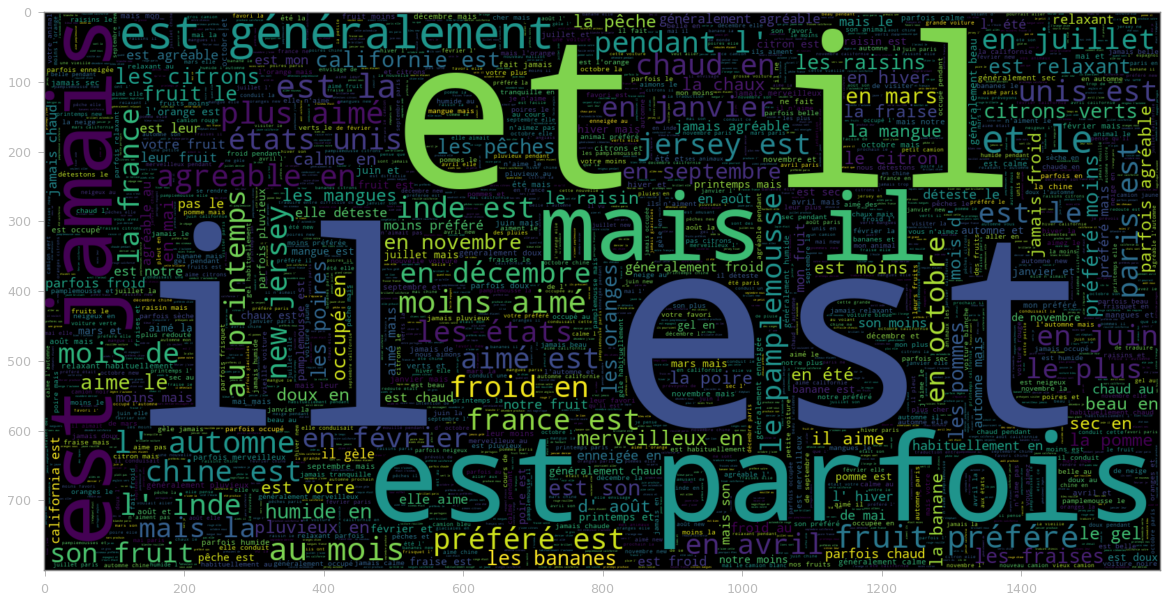

In [23]:
# obtain the count of french words
words = []
for i in df['french']:
    for word in i.split():
        words.append(word)


french_words_counts = Counter(words)

# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

print("french_words_counts: ",french_words_counts)

# append the values to a list for visuaization purpose
french_words = []
french_counts = []


for i in range(len(french_words_counts)):
    french_words.append(french_words_counts[i][0])
    french_counts.append(french_words_counts[i][1])

# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

In [24]:
def tokenize_and_pad(x, maxlen):
  #  a tokenier to tokenize the words and create sequences of tokenized words
    tokenizer = Tokenizer(char_level = False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
    return tokenizer, sequences, padded

In [25]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_french)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [26]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [27]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [29]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0  0  0  0  0  0  0]]


In [30]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [31]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [32]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [33]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

In [34]:
# Sequential Model
model = Sequential()
# embedding layer
# padding is based on maxlen_french length and hence input length is taking maxlen_french
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_french, mask_zero = True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 23, 256)           51200     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 23, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 23, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 23, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


In [35]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [36]:
# train the model
history = model.fit(x_train, y_train, batch_size=2, validation_split= 0.1, epochs=1)
# graphs can be created from hisotry

Train on 111666 samples, validate on 12408 samples
111666/111666 [==============================] - 551s 5ms/sample - loss: 0.5119 - accuracy: 0.8517 - val_loss: 0.1574 - val_accuracy: 0.9524


In [38]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [39]:
for i in range(5):

    print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
    print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
    print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - new jersey is wet during july and it is never beautiful in spring          

Original French word - new jersey est humide en juillet et il est jamais belle au printemps          

Predicted French word - new jersey est humide en juillet et il est jamais beau au printemps          




Original English word - china is cold during july but it is sometimes dry in january           

Original French word - chine est froid en juillet mais il est parfois sèche en janvier           

Predicted French word - chine est froid en juillet mais il est parfois sec en janvier           




Original English word - paris is sometimes beautiful during fall and it is usually warm in november          

Original French word - paris est parfois belle à l'automne et il est habituellement chaud en novembre          

Predicted French word - paris est parfois belle à l'automne et il est habituellement chaud en novembre          




Original English word - the apple is his favorite fr

In [40]:
x_test.shape

(13786, 23)

In [41]:
y_test.shape

(13786, 23)

In [42]:
x_train.shape, y_train.shape

((124074, 23), (124074, 23, 1))

In [43]:
test_eng = []
test_fr = []
predicted_fr = []

for i in range(x_test.shape[0]):
    test_eng.append(pad_to_text(x_test[i], x_tokenizer))
    test_fr.append(pad_to_text(y_test[i], y_tokenizer))
    predicted_fr.append(prediction(x_test[i:i+1]))

In [44]:
testdf = pd.DataFrame([test_eng, test_fr, predicted_fr]).T
testdf.columns = ['english', 'french', 'predicted_french']
testdf.head()

,english,french,predicted_french
0,new jersey is wet during july and it is never ...,new jersey est humide en juillet et il est jam...,new jersey est humide en juillet et il est jam...
1,china is cold during july but it is sometimes ...,chine est froid en juillet mais il est parfois...,chine est froid en juillet mais il est parfois...
2,paris is sometimes beautiful during fall and i...,paris est parfois belle à l'automne et il est ...,paris est parfois belle à l'automne et il est ...
3,the apple is his favorite fruit but the orange...,la pomme est son fruit préféré mais l'orange e...,la pomme est son fruit préféré mais l'orange e...
4,the united states is wet during summer and it ...,les états unis est humide pendant l' été et il...,les états unis est humide pendant l' été et il...


In [45]:

testdf.shape

(13786, 3)

In [10]:
!pip install sacrebleu datasets

from datasets import load_metric

metric = load_metric("sacrebleu")
predictions = [
    "elle n'aime manguiers"
]
references = [
    [
        "elle n'aime manguiers"
    ]
]
bleu_score = metric.compute(predictions=predictions, references=references)['score']

In [55]:
testdf.to_csv("baseline-predicitons-with-bleu-score.csv", index=False)

In [6]:
import pandas as pd
testdf = pd.read_csv("baseline-predicitons-with-bleu-score.csv")

In [12]:
def compute_bleu(pred, ref):
    return metric.compute(predictions=[pred], references=[[ref]])['score']

In [52]:
testdf = testdf.assign(bleu_score = testdf.apply(lambda x: compute_bleu(x.predicted_french, x.french)  ,axis=1))

In [53]:
testdf.bleu_score.mean()

87.81046663569853

In [8]:
testdf = testdf.assign(max_bleu_score = testdf.apply(lambda x: compute_bleu(x.french, x.french)  ,axis=1))

In [9]:
testdf.max_bleu_score.mean()

99.98549252865227

In [11]:
testdf[testdf.max_bleu_score<100]

,english,french,predicted_french,bleu_score,max_bleu_score
5156,they are going to paris,ils vont paris,ils ils à,0.000000,0.0
13220,she dislikes mangoes,elle n'aime manguiers,elle elle les mangues,15.973578,0.0


### We can see that baseline model achieves 87% of BLUE Score on test set. BLEU score ranges from 1 to 100, higher the better. Which seems to be good score to start modelling.

### Modification: I reduced batch size to 2. Epoch = 1. Input length as per maxlen_french.

### We can see that certain BLEU scores are 0 , even if we translate exactly same as reference translations. Need further investigations and we must remove such examples from our evaluation. Also there will be certain examples in training as well, we can try removing those from training as well and see if that helps.

### We can understand more by slicing down predictions with lower BLEU score and see if longer sentences are hard to model or shorter one. We can explore a lot of possibilities of improvements through such error analysis.